# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [1883]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 2. Loading and Cleaning with Pandas

### a.Train data

In [1884]:
#defining and reading train data
train_df=pd.read_csv('train-data.csv')

In [1885]:
#printing first five rows
train_df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [1886]:
#printinf last five rows
train_df.tail()

Unnamed: 0                      Name   Location  Year  \
6014        6014          Maruti Swift VDI      Delhi  2014   
6015        6015  Hyundai Xcent 1.1 CRDi S     Jaipur  2015   
6016        6016     Mahindra Xylo D4 BSIV     Jaipur  2012   
6017        6017        Maruti Wagon R VXI    Kolkata  2013   
6018        6018     Chevrolet Beat Diesel  Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
6014              27365    Diesel       Manual      First   28.4 kmpl   
6015             100000    Diesel       Manual      First   24.4 kmpl   
6016              55000    Diesel       Manual     Second   14.0 kmpl   
6017              46000    Petrol       Manual      First   18.9 kmpl   
6018              47000    Diesel       Manual      First  25.44 kmpl   

       Engine     Power  Seats  New_Price  Price  
6014  1248 CC    74 bhp    5.0  7.88 Lakh   4.75  
6015  1120 CC    71 bhp    5.0        NaN   4.00  
6016  2498 CC   112 bhp    8.0        NaN   2.90  
6017   998 CC  67.1 bhp    5.0        NaN   2.65  
6018   936 CC  57.6 bhp    5.0        NaN   2.50

In [1887]:
#gets the dimension of the dataframe
train_df.shape

(6019, 14)

In [1888]:
#checking column names
train_df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [1889]:
#removing unnamed column
train_df = train_df.drop('Unnamed: 0', axis=1)
train_df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [1890]:
#returns type if every column
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [1891]:
#gives the statics of the dataframe
train_df.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [1892]:
#returns the count of rows that contains no null values
train_df.count()

Name                 6019
Location             6019
Year                 6019
Kilometers_Driven    6019
Fuel_Type            6019
Transmission         6019
Owner_Type           6019
Mileage              6017
Engine               5983
Power                5983
Seats                5977
New_Price             824
Price                6019
dtype: int64

In [1893]:
#returns the no of null values in ech feature
train_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [1894]:
#droping null values of Mileage column which has two null values
train_df.dropna(subset=['Mileage'],inplace=True)

In [1895]:
#check whether it is droped or not
train_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                  36
Seats                  42
New_Price            5194
Price                   0
dtype: int64

In [1896]:
#fill the null values using backward fill
train_df.fillna(method='bfill',inplace=True)
train_df.head(10)

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
5      Hyundai EON LPG Era Plus Option   Hyderabad  2012              75000   
6               Nissan Micra Diesel XV      Jaipur  2013              86999   
7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016              36000   
8  Volkswagen Vento Diesel Comfortline        Pune  2013              64430   
9       Tata Indica Vista Quadrajet LS     Chennai  2012              65932   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   
5       LPG       Manual      First  21.1 km/kg   814 CC   55.2 bhp    5.0   
6    Diesel       Manual      First  23.08 kmpl  1461 CC   63.1 bhp    5.0   
7    Diesel    Automatic      First  11.36 kmpl  2755 CC  171.5 bhp    8.0   
8    Diesel       Manual      First  20.54 kmpl  1598 CC  103.6 bhp    5.0   
9    Diesel       Manual     Second   22.3 kmpl  1248 CC     74 bhp    5.0   

    New_Price  Price  
0   8.61 Lakh   1.75  
1   8.61 Lakh  12.50  
2   8.61 Lakh   4.50  
3     21 Lakh   6.00  
4     21 Lakh  17.74  
5     21 Lakh   2.35  
6     21 Lakh   3.50  
7     21 Lakh  17.50  
8  10.65 Lakh   5.20  
9  10.65 Lakh   1.95

In [1897]:
#check whether it is droped or not
train_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            4
Price                0
dtype: int64

In [1898]:
#drop five remaining null values of new_price
train_df.dropna(subset=['New_Price'],inplace=True)

In [1899]:
##check whether it is droped or not
train_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [1900]:
#deminsion of cleaned data
train_df.shape

(6013, 13)

In [1901]:
#Removing the units in the values using replace
train_df['Power']=train_df['Power'].str.replace('bhp', ' ')
train_df['Mileage']=train_df['Mileage'].str.replace('kmpl', ' ')
train_df['Mileage']=train_df['Mileage'].str.replace('km/kg', ' ')

In [1902]:
#Removing the units in the values using split
def get_engine(cc):  
    engine = cc.split(" ")[0]
    return engine
train_df['engine'] = train_df.Engine.map(get_engine)
train_df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage   Engine    Power  Seats  \
0       CNG       Manual      First   26.6     998 CC  58.16      5.0   
1    Diesel       Manual      First  19.67    1582 CC  126.2      5.0   
2    Petrol       Manual      First   18.2    1199 CC   88.7      5.0   
3    Diesel       Manual      First  20.77    1248 CC  88.76      7.0   
4    Diesel    Automatic     Second   15.2    1968 CC  140.8      5.0   

   New_Price  Price engine  
0  8.61 Lakh   1.75    998  
1  8.61 Lakh  12.50   1582  
2  8.61 Lakh   4.50   1199  
3    21 Lakh   6.00   1248  
4    21 Lakh  17.74   1968

In [1903]:
#checking datatypes
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
engine                object
dtype: object

In [1904]:
#converting datatypes
train_df["engine"] = train_df["engine"].astype(float)
train_df["Mileage"] = train_df["Mileage"].astype(float)
train_df['Power'] = pd.to_numeric(train_df['Power'], errors='coerce')


In [1905]:
#checking datatypes
train_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                float64
Seats                float64
New_Price             object
Price                float64
engine               float64
dtype: object

### b. Test data

In [1906]:
test_df=pd.read_csv('test-data.csv')
test_df.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [1907]:
test_df = test_df.drop('Unnamed: 0', axis=1)
test_df.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [1908]:
test_df.shape

(1234, 12)

In [1909]:
test_df.dropna(axis = 0,inplace=True)
test_df.head() 

Name Location  Year  \
2   Toyota Innova Crysta Touring Sport 2.4 MT   Mumbai  2017   
30                 Toyota Etios Cross 1.4L VD  Chennai  2014   
36               Skoda Rapid 1.6 MPI AT Style   Mumbai  2017   
39              BMW 5 Series 520d Luxury Line   Mumbai  2012   
43               Skoda Rapid 1.6 MPI Ambition   Jaipur  2018   

    Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
2               34000    Diesel       Manual      First  13.68 kmpl  2393 CC   
30              70000    Diesel       Manual     Second  23.59 kmpl  1364 CC   
36              13500    Petrol    Automatic      First  14.84 kmpl  1598 CC   
39              66889    Diesel    Automatic      First  22.48 kmpl  1995 CC   
43               4000    Petrol       Manual      First  15.41 kmpl  1598 CC   

         Power  Seats   New_Price  
2    147.8 bhp    7.0  25.27 Lakh  
30   67.06 bhp    5.0   9.27 Lakh  
36  103.52 bhp    5.0  14.95 Lakh  
39     190 bhp    5.0  70.43 Lakh  
43  103.52 bhp    5.0  11.89 Lakh

In [1910]:
test_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

In [1911]:
features=['Mileage','Kilometers_Driven','engine']
target =['Power']

In [1912]:
test_df['Mileage']=test_df['Mileage'].str.replace('km/kg', ' ')
test_df['Mileage']=test_df['Mileage'].str.replace('kmpl', ' ')
test_df['Power']=test_df['Power'].str.replace('bhp', ' ')

In [1913]:
def get_engine(cc):  
    engine = cc.split(" ")[0]
    return engine
test_df['engine'] = test_df.Engine.map(get_engine)
test_df.head()

Name Location  Year  \
2   Toyota Innova Crysta Touring Sport 2.4 MT   Mumbai  2017   
30                 Toyota Etios Cross 1.4L VD  Chennai  2014   
36               Skoda Rapid 1.6 MPI AT Style   Mumbai  2017   
39              BMW 5 Series 520d Luxury Line   Mumbai  2012   
43               Skoda Rapid 1.6 MPI Ambition   Jaipur  2018   

    Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage   Engine  \
2               34000    Diesel       Manual      First  13.68    2393 CC   
30              70000    Diesel       Manual     Second  23.59    1364 CC   
36              13500    Petrol    Automatic      First  14.84    1598 CC   
39              66889    Diesel    Automatic      First  22.48    1995 CC   
43               4000    Petrol       Manual      First  15.41    1598 CC   

       Power  Seats   New_Price engine  
2    147.8      7.0  25.27 Lakh   2393  
30   67.06      5.0   9.27 Lakh   1364  
36  103.52      5.0  14.95 Lakh   1598  
39     190      5.0  70.43 Lakh   1995  
43  103.52      5.0  11.89 Lakh   1598

In [1914]:
test_df["engine"] = test_df["engine"].astype(float)
test_df["Mileage"] = test_df["Mileage"].astype(float)
test_df['Power'] = pd.to_numeric(test_df['Power'], errors='coerce')
test_df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                float64
Seats                float64
New_Price             object
engine               float64
dtype: object

In [1915]:
test_x=test_df[['Mileage','Kilometers_Driven','engine']]
test_y=test_df[['Power']]

# 3.  EDA and Visualization

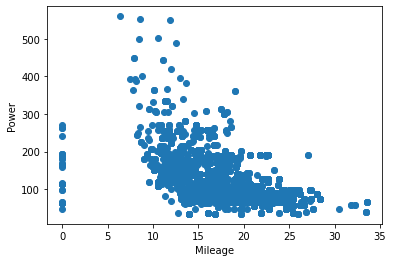

In [1916]:
#Mileage vs power
x = train_df.Mileage
y = train_df.Power
plt.scatter(x,y)
plt.xlabel('Mileage')
plt.ylabel('Power')
plt.show()

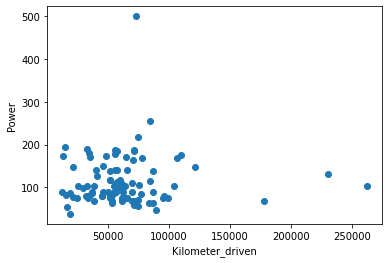

In [1917]:
#kilometer_driven vs power
x = train_df.Kilometers_Driven[:100]
y = train_df.Power[:100]
plt.scatter(x,y)
plt.xlabel('Kilometer_driven')
plt.ylabel('Power')
plt.show()

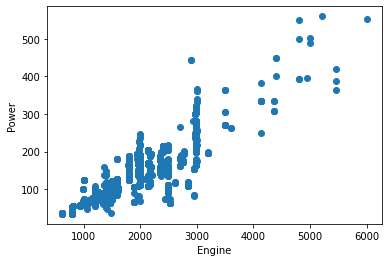

In [1918]:
#Power Vs Engine
x = train_df.engine
y = train_df.Power
plt.scatter(x,y)
plt.xlabel('Engine')
plt.ylabel('Power')
plt.show()

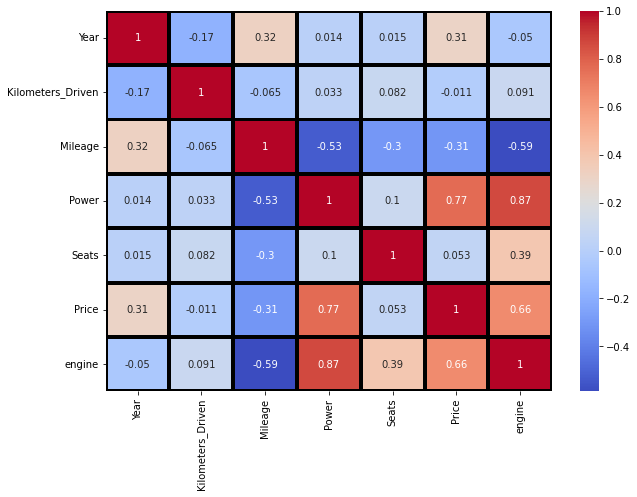

In [1919]:
corr_Matrix = train_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_Matrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

# 4. Feature Engineering 

# Finding and Removing Outlier of trin data

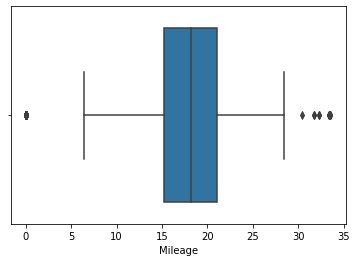

In [1920]:
#features=['Mileage','Kilometers_Driven','engine']
#target =['Power']
#Mileage outlier
sns.boxplot(x=train_df['Mileage'])
plt.show()

In [1921]:
Q1 = train_df.Mileage.quantile(0.25)
Q3 = train_df.Mileage.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [1922]:
train_df1=train_df[(train_df.Mileage> lowerlimit)  & (train_df.Mileage < upperlimit)]
train_df1.shape

(5931, 14)

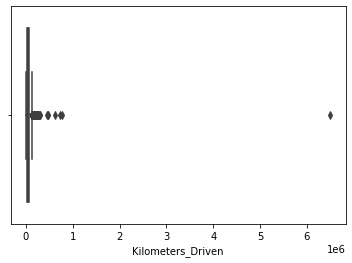

In [1923]:
# Kilometers_driven outlier
sns.boxplot(x=train_df1[features[1]])
plt.show()

In [1924]:
Q1 = train_df1.Kilometers_Driven.quantile(0.25)
Q3 = train_df1.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [1925]:
train_df2=train_df1[(train_df1.Kilometers_Driven > lowerlimit)  & (train_df1.Kilometers_Driven < upperlimit)]
train_df2.shape

(5734, 14)

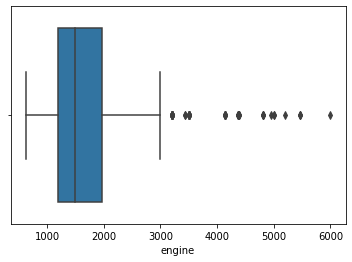

In [1926]:
# engine outlier
sns.boxplot(x=train_df2[features[2]]);

In [1927]:
Q1 = train_df2.Kilometers_Driven.quantile(0.25)
Q3 = train_df2.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [1928]:
train_df3=train_df2[(train_df2.Kilometers_Driven > lowerlimit)  & (train_df2.Kilometers_Driven < upperlimit)]
train_df3.shape

(5693, 14)

In [1929]:
train_x=train_df3[['Mileage','Kilometers_Driven','engine']]
train_x.head()

Mileage  Kilometers_Driven  engine
0    26.60              72000   998.0
1    19.67              41000  1582.0
2    18.20              46000  1199.0
3    20.77              87000  1248.0
4    15.20              40670  1968.0

In [1930]:
train_y=train_df3[['Power']]
train_y.head()

Power
0   58.16
1  126.20
2   88.70
3   88.76
4  140.80

In [1931]:
#Checking null values in final dataframe
train_x.isna().sum()

Mileage              0
Kilometers_Driven    0
engine               0
dtype: int64

In [1932]:
#Checking null values in final dataframe
train_y.isna().sum()

Power    75
dtype: int64

In [1933]:
#filling null values
train_y.fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


# 5.Model Training

## Random forest algorithm

In [1934]:
from sklearn.ensemble import RandomForestRegressor

In [1935]:
rfgre = RandomForestRegressor(n_estimators=200)
rfgre.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=200)

# 6. Prediction

prediction for random forest

In [1936]:
r_pred = rfgre.predict(test_x)
r_pred

array([147.8       ,  16.8731    , 104.4376    , 189.94      ,
       128.322     ,  88.133     ,  66.42053   ,  67.0388    ,
       108.3876    ,  83.8946    ,  81.5976    , 168.5976    ,
        83.0935    , 104.103625  , 160.99455   ,  68.307     ,
        81.9943    , 175.7061    ,  67.04      ,  98.9341    ,
       121.234     , 107.3922    ,  47.3       , 259.9446    ,
        85.60715   ,  74.31875   , 190.        , 161.5618    ,
       126.2006    , 172.2163    ,  79.9845    ,  83.1       ,
        81.97940417, 190.93265   , 107.5732    ,  89.65810619,
        98.96      , 106.4679    ,  82.3023    ,  98.0479    ,
        68.2509    , 149.1584    ,  97.99625   ,  72.813     ,
       139.12405   ,  82.45438333, 495.5885    , 171.626     ,
        68.0843    ,  82.9879    , 183.56105   ,  88.4275    ,
        74.02125   ,  72.985     , 182.8285    ,  83.3565    ,
        81.8065    ,  67.03329667,  75.98125   , 108.45804167,
       105.024275  , 126.2       ,  76.1568    ,  88.5 

# 7. Evaluating your Model

In [1937]:
score=r2_score(test_y,r_pred)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(test_y,r_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(test_y,r_pred)))

r2 socre is  0.9351541747586969
mean_sqrd_error is== 255.8522071065274
root_mean_squared error of is== 15.995380805298991


In [1938]:
Y_train_pred= rfgre.predict(train_x)
Y_test_pred= rfgre.predict(test_x)
print("Train set accuracy: ",r2_score(train_y,Y_train_pred))
print("Test set accuracy : ",r2_score(test_y,Y_test_pred))

Train set accuracy:  0.9915641164423116
Test set accuracy :  0.9351541747586969


# SUBMISSION DATE: 17th April 2022



